<a href="https://colab.research.google.com/github/Alokathilakarathna/ME422_B3/blob/main/Vibration%20Lab/e20452.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Vibration Lab**
> ME 422 - Mechanical Systems Lab

> W.S.P.Y.J.C.YAPA (E/20/452)

In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import brentq,fsolve
import matplotlib.pyplot as plt

# System Modeling

## Flexural Vibration of Beam

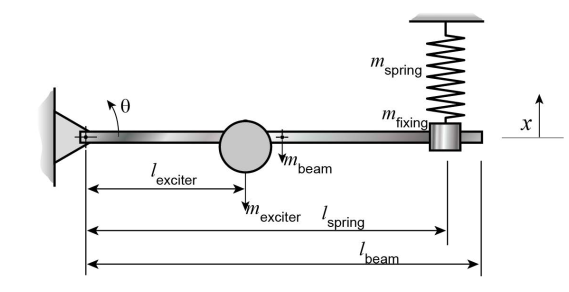

*Figure 01: Beam and Spring Setup*

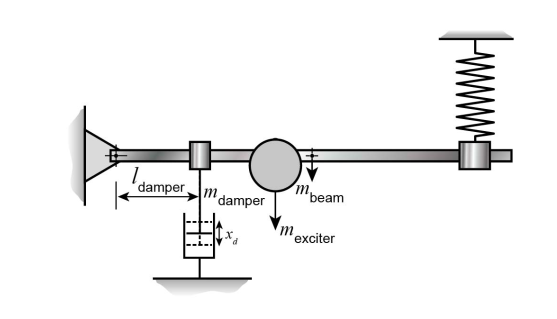

*Figure 02: Beam and Spring with Viscous Damping Setup*

### General Equation

When considering the flexural vibration of a beam, the vibration is in the “transverse” or “lateral” direction,
which is accompanied by bending (or flexure) of the member. Hence, the vibrations are perpen-
dicular to the main axis of the member. But a beam, unlike a string can support shear forces and bending moments at
its cross section.

The Bernoulli-Euler equation, which governs transverse vibration of thin beams, consider
a beam in bending, in the x-y plane, with x as the longitudinal axis and y as the transverse axis of
bending deflection.

Considering a small beam element of length δ𝓧 we can define the Bernoulli-Euler equation as follow.


$$
ρA \frac{∂ ^2 v(x,t)}{∂ t^2}
+ c \frac{∂  v(x,t)}{∂ t}
+ P \frac{\partial^2 v(x,t)}{\partial x^2}
+ \frac{∂^2}{∂ x^2} \left(EI \frac{∂^2 v(x,t)}{∂ x^2}\right)
= f(x,t)
$$

ρ : mass density of the beam material $kg/m^3$

A : cross-sectional area of the beam $m^2$

E : Young's modulus of the beam material $N/m^2$

I : second moment of area of the beam cross-section $m^4$

c : viscous damping coefficient per unit length $N \cdot s/m^2$

v(x,t) : transverse displacement of the beam at position $x$ and time $t$ $m$

f(x,t) : distributed transverse force per unit length acting on the beam $N/m$


### Equation for Experimental Setup


Considering the specific setup the damper and the exiter are in localized points,

$$
\rho A \frac{\partial^2 v(x,t)}{\partial t^2}
+ EI \frac{\partial^4 v(x,t)}{\partial x^4}
+ c\ \delta(x-l_d) \frac{\partial v(x,t)}{\partial t}
=
F_e\sin(ω_e t)\,\delta(x-l_e)\tag{1}
$$

ρ : mass density of the beam material $kg/m^3$

b : Breadth m

h : Thickness m

A : cross-sectional area of the beam $(b.h)$ $m^2$

E : Young's modulus of the beam material $N/m^2$

I : second moment of area of the beam cross-section $m^4$

v(x,t) : transverse displacement of the beam at position $x$ and time $t$ $m$

EI : flexural rigidity of the beam $N\cdot m^2$

c : viscous damping coefficient of the dashpot $N\cdot s/m$

l_d : position of the dashpot measured from the reference end of the beam $m$

$F_e$ : amplitude of harmonic point force $N$

$ω_e$ : forcing angular frequency $rad/s$

l_e : position of the exciter (point force location) measured from the reference end $m$

δ(x-l) : Dirac delta function (represents a force/damper applied at a single point)



## Parameters of Experimental Setup

In [4]:
# --- Beam Properties ---------------------------------------------------------
b         = 0.025             # [m]      Breadth
h         = 0.01              # [m]      Thickness
M         = 1.65              # [kg]     Mass of the beam
L         = 0.815             # [m]      Beam length
E         = 2e+11             # [Pa]     Modulus of Elasticity

# Calculated Beam Properties
A         = b * h             # [m^2]    Cross-sectional area
I         = b * h**3 / 12     # [m^4]    Area Moment of Inertia
rho       = M/(L*A)               # [kg/m]   Mass per unit length

# --- Spring Properties -------------------------------------------------------
k_s       = 3800              # [N/m]    Spring stiffness
l_s       = L              # [m]      Location of spring along beam
m_s       = 0.388             # [kg]     Spring mass
m_f       = 0.009             # [kg]     Fixed mass attached to spring

# Derived Spring Properties
k_theta   = k_s * l_s**2  # [N*m/rad] Rotational spring stiffness at base

# --- Damper Properties -------------------------------------------------------
l_d       = 0.2               # [m]      Location of damper along beam
m_d       = 0.53              # [kg]     Mass associated with damper

# --- Exciter Properties ------------------------------------------------------
m_e       = 4.2               # [kg]     Exciter mass
l_e       = 0.4               # [m]      Exciter location along beam

## Assume Free Vibration and Undamped Conditions

Assume free vibration conditions
$$F_e\sin(ω_e t)\,\delta(x-l_e) = 0$$

Assuming undamped conditions
$$ c= 0$$
Assuming the beam is uniform throught x,
$$ EI = contant $$


Therefore from (1),

$$
ρA \frac{∂ ^2 v(x,t)}{∂ t^2}
+ EI \frac{∂^4 v(x,t)}{∂ x^4}
= 0
\tag{2}
$$



## Modal Analysis


In each mode, the system will vibrate in a fixed shape ratio. Therefore, the time and space functions
can be separable for a modal motion,

Assume solution for $v(x,t)$, is in form of,

$$v(x,t) = Y(x) . q(t) \tag{3}$$


$Y(x)$ - Eigen Function/ Mode shape

$q(t)$ - Generalized Corrdinate

Computing partial derivatives of $v(x,t)$


Velocity (First time derivative):
$$\frac{\partial v(x,t)}{\partial t} = Y(x) \dot{q}(t)$$

Acceleration (Second time derivative):
$$\frac{\partial^2 v(x,t)}{\partial t^2} = Y(x) \ddot{q}(t)$$

Beam Curvature/Flexure (Fourth spatial derivative):
$$\frac{\partial^4 v(x,t)}{\partial x^4} = \frac{d^4 Y(x)}{dx^4} q(t) = Y''''(x) q(t)$$


Substitute these derivatives back into the governing equation (2)

$$\rho A . Y(x) \ddot{q}(t) + EI. Y''''(x) q(t) = 0 \tag{4}$$


### Variable Seperation



To separate the variables, divide the entire equation (4) by $ρA. Y(x) q(t)$,

$$\frac{\ddot{q}(t)}{q(t)} +  \frac{EI}{\rho A} \frac{Y''''(x)}{Y(x)} = 0$$

by rearranging the terms to place all $x$-dependent terms on one side and all $t$-dependent terms on the other,

$$
\frac{EI}{\rho A} \frac{Y''''(x)}{Y(x)}
= -\frac{\ddot{q}(t)}{q(t)}
$$

Since the left side depends only on space ($x$) and the right side depends only on time ($t$), both sides must be equal to a constant.

For harmonic vibrations, take this seperation constant as $\omega^2$ (where $\omega$ represents the natural frequency),

$$
\frac{EI}{\rho A} \frac{Y''''(x)}{Y(x)}
=  -\frac{\ddot{q}(t)}{q(t)}
= \omega^2 \tag{5}
$$


Equation (5) yields two ordinary differential equations,

**Temporal Equation (Time Response):**
$$\ddot{q}(t) + \omega^2 q(t) = 0 \tag{6}$$

**Spatial Equation (Mode Shape)**
$$\frac{EI}{\rho A} Y''''(x) - \omega^2 Y(x) = 0$$

$$Y''''(x) - \frac{\rho A \omega^2}{EI} Y(x) = 0 \tag{7}$$

Rewite this as,
$$Y''''(x) - λ^4 Y(x) = 0 \tag{8}$$

Taking,
$$ λ^4 = \frac{ρAω^2}{EI}$$

Then Nat
$$ ω = λ^2 \sqrt{\frac{EI}{ρA}} \tag{9}$$

Therefore we can see that natural requancy of the system independent of damping





### General Solution

Assume solution of $Y(x)$ is in following form,
$$Y(x) = e^{px}$$

Then,
$$Y'(x) = p\ e^{px}$$
$$Y''(x) = p^2\ e^{px}$$
$$Y'''(x) = p^3\ e^{px}$$
$$Y''''(x) = p^4\ e^{px}$$

Substituting that back to equation (8)
$$p^4\ e^{px} - λ^4e^{px} = 0$$
$$p^4 - λ^4 =0 $$

Then we can solve that to find p,
$$ p = \pm\ λ , \pm\ jλ $$

Therefore general solution of Y(x),
$$ Y(x) = A_1 e^{λx} + A_2 e^{-λx} + A_3 e^{jλx} + A_4 e^{-jλx}$$
\
$$ Y(x) = C_1 cosh(λx) + C_2 sinh(λx) + C_3 cos(λx) + C_4 sin(λx) \tag{10}$$
\
There five unknowns, find those using bondary conditions. usually one variable is normalized and absorbed by $q(t)$ as magnification factor. Therefore to find general solution 4 boundary conditions are suffitiant.


### Boundary Conditions

The procedure is to apply the seperatable solutions to the end relations, this relations has to be true for all possible $q(t)$,

\
At $x=0$, TM1016V manual describes the left support as a "pivot" using "high-quality ball races for lowest friction". Which means,

Deflection is zero:
$v(0,t)=0 ⇒ Y(0)=0$

Moment is zero: $v''(0,t)=0 ⇒ Y''(0)=0$

\
At $x=L$, he manual states the spring is attached near the end. Which means The beam is free to rotate (no moment), but the vertical displacement is resisted by the spring force ($F=-kY$).

Moment is zero: $v''(L,t)=0 ⇒ Y''(L)=0$

Shear Force Balance:$-EIv'''(L,t)-kv(L,t)=0 ⇒  EIY'''(L)-kY(L)=0$

From equation (10),
$$ Y(x) = C_1 cosh(λx) + C_2 sinh(λx) + C_3 cos(λx) + C_4 sin(λx) \tag{10}$$
\
$$ Y'(x) = λ\ ( C_1 sinh(λx) + C_2 cosh(λx) - C_3 sin(λx) + C_4 cos(λx))$$
\
$$ Y''(x) = λ^2\ ( C_1 cosh(λx) + C_2 sinh(λx) - C_3 cos(λx) - C_4 sin(λx))$$

By Applying boundary condition at $x=0$

$Y(0) = 0$
$$ C_1 + C_3 = 0 $$

$Y''(0) = 0$
$$ λ^2 ( C_1 - C_3) = 0 $$

Therefore,
$$C_1 = C_3 = 0 $$

Then mode shape simplifies to,
$$ Y(x) = C_2 sinh(λx) + C_4 sin(λx)$$
\
$$ Y'(x) = λ\ ( C_2 cosh(λx)+ C_4 cos(λx))$$
\
$$ Y''(x) = λ^2\ (C_2 sinh(λx) - C_4 sin(λx))$$
\
$$ Y'''(x) = λ^3\ (C_2 cosh(λx) - C_4 cos(λx))$$
\
By Appling boundary conditions at $x=L$,
$Y''(L) = 0$
$$ C_2 sinh(λL) - C_4 sin(λL) = 0$$
$$ C_2  = C_4 \frac{sin(λL)}{sinh(λL)}$$
$EIY'''(L) +kY(L) = 0$
$$EIλ^3 (coth(λL)-cot(λL))= 2k$$
\
Then by solving $λ$ for this equation we can Calcualte natural Frequencies.
\
\
To get genral solution of Y(x) lets normalize as $C_4 =1$, Then for each $λ_i$ of $i=1,2,3..$

$$ Y_i(x) = sin(λ_ix) + \frac{sin(λ_iL)}{sinh(λ_iL)} sinh(λ_ix)\tag{11}$$
\
$$ω_i = λ_i^2 \sqrt{\frac{EI}{ρA}}\tag{12}$$

## Forced Response

The equation of motion for the beam is given by:
$$
\rho A \frac{\partial^2 v(x,t)}{\partial t^2} + EI \frac{\partial^4 v(x,t)}{\partial x^4} + c_d \delta(x-l_d) \frac{\partial v(x,t)}{\partial t} = F_e \sin(\omega_e t) \delta(x-l_e) \tag{1}
$$

Using the separation of variables for modal expansion:
$$v(x,t) = \sum_{i=1}^{N} Y_i(x) q_i(t) \tag{3}$$

Substituting Equation (3) into (1):
$$
\rho A \sum_{i=1}^{N} Y_i(x) \ddot{q}_i(t) + EI \sum_{i=1}^{N} Y_i''''(x) q_i(t) + c_d \delta(x - l_d) \sum_{i=1}^{N} Y_i(x) \dot{q}_i(t) = F_0 \sin(\Omega t) \delta(x - l_e) \tag{13}
$$

To project onto mode $j$, we multiply Equation (13) by $Y_j(x)$ and integrate from $0$ to $L$:
$$
\sum_{i=1}^{N} \left( \int_{0}^{L} \rho A Y_j(x) Y_i(x) dx \right) \ddot{q}_i(t) + \sum_{i=1}^{N} \left( \int_{0}^{L} EI Y_j(x) Y_i''''(x) dx \right) q_i(t) + c_d \sum_{i=1}^{N} Y_j(l_d) Y_i(l_d) \dot{q}_i(t) = F_0 Y_j(l_e) \sin(\Omega t)
$$
*(Utilizing the property: $\int f(x) \delta(x-a) dx = f(a)$)*

The system can be written in the generalized coupled form:
$$
\sum_{i=1}^{N} M_{ji} \ddot{q}_i(t) + \sum_{i=1}^{N} C_{ji} \dot{q}_i(t) + \sum_{i=1}^{N} K_{ji} q_i(t) = Q_j(t) \tag{14}
$$

Where the modal parameters are defined as:

Mass Matrix: $\displaystyle M_{ji} = \int_{0}^{L} \rho A Y_j(x) Y_i(x) dx$

Damping Matrix: $\displaystyle C_{ji} = c_d Y_j(l_d) Y_i(l_d)$

Stiffness Matrix: $\displaystyle K_{ji} = \int_{0}^{L} EI Y_j(x) Y_i''''(x) dx$

Generalized Force: $\displaystyle Q_j(t) = F_0 Y_j(l_e) \sin(\Omega t)$

## Adding Lumped Masses

Since we use undamped modes as $Y_i$, using orthogonality of eigen functions,

$$\int_{0}^{L} \rho A Y_j(x)Y_i(x) = 0\ (i \neq j) dx$$

Also since they solve eigen problem,
$$K_{ji} = ω_i^2 M_{ji}$$
\
**Assumptions**
In practicle systems damping terms are not perfectly diagonal. But for light damping applications the coupling effect is small. Therefore we assume that the damping is decoupled.

$C_{ji} \approx 0\ (i \neq j)$
$C_{ii} = c_d Y_j^2(l_d)$
\
\
Then we can write the equation(14) considering a single mode as,
\
$$M_j \ddot{q}_j(t) + C_j \dot{q}_j(t) + K_j q_j(t) = Q_j(t) \tag{15}$$

Where,

$M_j = \int_0^L  \rho A Y_j^2(x) +  (\text{lumped masses})$

$C_{j} = c_d Y_j^2(l_d)$

$K_{j} = ω_j^2 M_j$

$Q_i(t)= F_0 Y_j(l_e)\sin(\Omega t) $


Considering the lumped masses connected to spring,

Mass of the exciter $m_e$ at $l_e$

Mass of the damper $m_d$ at $l_d$

Mass of the spring fixer assembly $m_f$ at $l_s = L$

Effective mass of spring $\alpha\ m_s$ at $l_s = L$ ($α$ is the spring effective mass factor, Assume $α ≈ \frac{1}{3}$)
\
$$
M_j
=
\int_{0}^{L}\rho A\,Y_j^2(x)\,dx
\;+\;
m_e\,Y_j^2(l_e)
\;+\;
m_d\,Y_j^2(l_d)
\;+\;
\left(m_f + \alpha\, m_s\right)\,Y_j^2(l_e)
$$




## Initial Conditions

# Activity 1 - Capture the first two dominant modes of small amplitude vibration of the system by a 2-dof freedom model

In [1]:
N = 5

In [5]:
# @title
def cot(x):
    return np.cos(x)/np.sin(x)

def coth(x):
    return np.cosh(x)/np.sinh(x)

def find_betas(alpha, N=3, eps=1e-6):
    betas = []
    for n in range(1, N+1):
        a = (n-1)*np.pi + eps
        b = n*np.pi - eps

        def F(beta):
            return beta**3*(coth(beta) - cot(beta)) - alpha

        # Ensure there's a sign change; if not, scan inside the interval
        xs = np.linspace(a, b, 2000)
        Fs = F(xs)
        idx = np.where(np.sign(Fs[:-1]) != np.sign(Fs[1:]))[0]
        if len(idx) == 0:
            raise RuntimeError(f"No root bracket found in interval n={n}")

        i0 = idx[0]
        root = brentq(F, xs[i0], xs[i0+1])
        betas.append(root)

    return np.array(betas)

alpha = 2*k_s*L**3/(E*I)
betas = find_betas(alpha, N)
lambdas = betas / L
# betas, lambdas

beam_factor = np.sqrt((E * I) / (rho * A))
omegas = (lambdas**2) * beam_factor
freqs_hz = omegas / (2 * np.pi)

df = pd.DataFrame({
    'Mode': range(1, len(betas) + 1),
    # 'Beta': betas,
    'Lambda (1/m)': lambdas,
    'Omega (rad/s)': omegas,
    'Frequency (Hz)': freqs_hz
})
df

,Mode,Lambda (1/m),Omega (rad/s),Frequency (Hz)
0,1,2.350892,79.285984,12.618756
1,2,4.919477,347.191543,55.257250
2,3,8.690397,1083.453804,172.437029
3,4,12.533533,2253.607377,358.672754
4,5,16.385088,3851.489707,612.983625


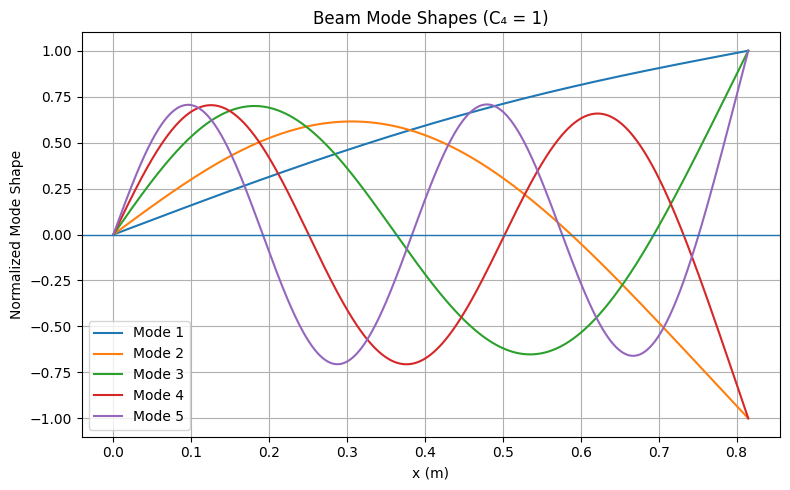

In [6]:
# @title
def plot_modes(lambdas, L, normalize=True, n_points=1000):
    """
    Plot beam mode shapes for given lambdas

    Parameters
    ----------
    lambdas : array-like
        Eigenvalues λ_i (1/m)
    L : float
        Beam length (m)
    normalize : bool
        Normalize each mode to max(|Y|)=1
    n_points : int
        Number of spatial points
    """

    x = np.linspace(0, L, n_points)

    plt.figure(figsize=(8,5))

    for i, lam in enumerate(lambdas, start=1):
        Y = np.sin(lam * x) + (np.sin(lam * L) / np.sinh(lam * L)) * np.sinh(lam * x)

        if normalize:
            Y = Y / np.max(np.abs(Y))

        plt.plot(x, Y, label=f"Mode {i}")

    plt.axhline(0, linewidth=1)
    plt.xlabel("x (m)")
    plt.ylabel("Normalized Mode Shape")
    plt.title("Beam Mode Shapes (C₄ = 1)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_modes(lambdas=lambdas, L=L)


# Activity 2 - Capture the first two dominant modes of small amplitude vibration of the system by a 2-dof freedom model

## adfa
